In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

city_data_to_load.head()



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:

combined_data = pd.merge(city_data_to_load,ride_data_to_load,on='city',how='right')


In [4]:

df1 = combined_data.groupby(["city"]).agg({"fare":'mean',
                                           "ride_id": 'count',
                                           "driver_count": 'first',
                                           "type": 'first'})


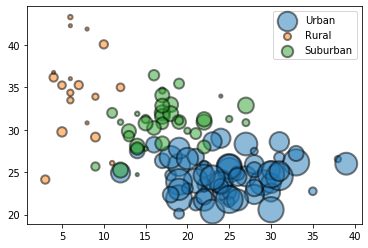

In [5]:
# use the scatter function
labels=list(set(df1.type))
nCityType = len(labels)

for i in range(nCityType):
    plt.scatter(  df1[df1['type']==labels[i]].ride_id, 
                  df1[df1['type']==labels[i]].fare, 
                s=df1[df1['type']==labels[i]].driver_count*10,
                alpha=0.5, linewidth=2,edgecolors='black',
                label=labels[i])
       
plt.legend()
plt.show()


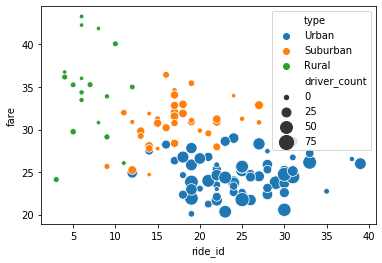

In [6]:
import seaborn as sns
sns.scatterplot(x='ride_id',y='fare',data=df1,
                hue='type',size='driver_count',sizes=(20,200))


In [7]:
combined_data

#dataframe: Total Fares, Total Rides, Total Drivers by City Type
df2 = combined_data.groupby(["type"]).agg({"fare":'sum',
                                           "ride_id": 'count',
                                           "driver_count": 'first'})
# convert to %
df2 = df2/df2.sum() * 100.0

df2


,fare,ride_id,driver_count
type,,,
Rural,6.811493,5.263158,13.461538
Suburban,30.463872,26.315789,13.461538
Urban,62.724635,68.421053,73.076923


---
## Pie Chart 1: % of Total Fares by City Type

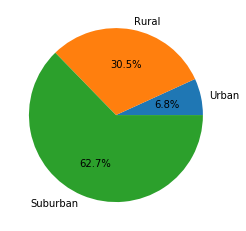

In [8]:
plt.pie(df2.fare,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()


---
## Pie Chart 2: % of Total Rides by City Type

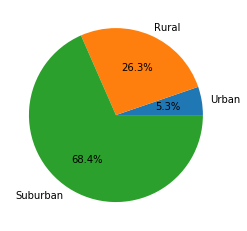

In [9]:
plt.pie(df2.ride_id,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()


---
## Pie Chart 3: % of Total Drivers by City Type

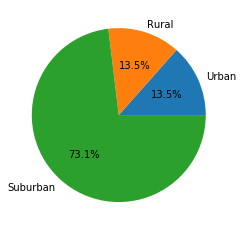

In [10]:
plt.pie(df2.driver_count,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()